<a href="https://colab.research.google.com/github/Rossel/DataQuest_Courses/blob/master/023__Multiple_plots_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE 2/6: EXPLORATORY DATA VISUALIZATION

# MISSION 2: Multiple plots

*Learn how matplotlib represents plots to work with multiple plots.*

In this mission, we will learn about the important matplotlib building blocks and used them to experiment with creating multiple line charts. 


## 1. Recap


In the previous mission, we explored how a visual representation of data can help us reach observations about data more quickly than a table representation of the same data. We learned how to work with the pyplot module, which provides a high-level interface to the matplotlib library, to create and customize a line chart of unemployment data. To look for potential seasonality, we started by creating a line chart of unemployment rates from 1948.

In this mission, we'll dive a bit deeper into matplotlib to learn how to create multiple line charts to help us compare monthly unemployment trends across time. 

### Introduction to the Data

![BLS logo](https://www.nccaom.org/wp-content/uploads/2016/12/BLS-Timeline-Main.jpg)

Just like in the last mission, we will use a specific type of data visualization to understand U.S. unemployment data. The United States [Bureau of Labor Statistics (BLS)](https://www.bls.gov/) surveys and calculates the monthly unemployment rate. The unemployment rate is the percentage of individuals in the labor force without a job. To find more information about how the BLS calculates the unemployment rate click [here](http://www.bls.gov/cps/cps_htgm.htm).

The BLS releases monthly unemployment data available for download as an Excel file, with the `.xlsx` file extension. While the pandas library can read in XLSX files, it relies on an external library for actually parsing the format. Let's instead download the same dataset as a CSV file [here](https://drive.google.com/file/d/1ccblpyB_BGKKtkAL8XbwOpJWtEBqdn8p/view?usp=sharing) or [here](https://github.com/Rossel/DataQuest_Courses/blob/master/datasets/unrate.csv). 

The dataset contains the monthly unemployment rate as a CSV from January 1948 to August 2016 and is saved as `unrate.csv`. Before we get into visual representations of data, let's first read this CSV file into pandas to explore the table representation of this data. The dataset we'll be working with is a [time series](https://en.wikipedia.org/wiki/Time_series) dataset, which means the data points (monthly unemployment rates) are ordered by time.

Let's start by importing the libraries we need and reading the dataset into pandas using Google Colab.

In [2]:
# Import functions from Google modules into Colaboratory
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
# Insert file id from Google Drive shareable link:
# https://drive.google.com/file/d/1ccblpyB_BGKKtkAL8XbwOpJWtEBqdn8p/view?usp=sharing
id = "1ccblpyB_BGKKtkAL8XbwOpJWtEBqdn8p"

In [4]:
# Download the dataset
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('unrate.csv')

In [5]:
# Import pandas library and read csv
import pandas as pd
unrate = pd.read_csv('unrate.csv')

In [6]:
# Convert the DATE column into a series of datetime values
unrate['DATE'] = pd.to_datetime(unrate['DATE'])

In [7]:
# Retrieve info on the unrate dataframe
unrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    824 non-null    datetime64[ns]
 1   VALUE   824 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.0 KB


We can see here that the `DATE` column is of the `datetime64` Dtype.

In [8]:
# Print the first 12 rows
unrate.head(12)

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
5,1948-06-01,3.6
6,1948-07-01,3.6
7,1948-08-01,3.9
8,1948-09-01,3.8
9,1948-10-01,3.7


In [9]:
# Print dataframe dimensions
print(unrate.shape)

(824, 2)


## Recap from Last Mission
Let's practice what you learned in the previous mission:

In [10]:
# Import the matplotlib library
import matplotlib as mpl
import matplotlib.pyplot as plt

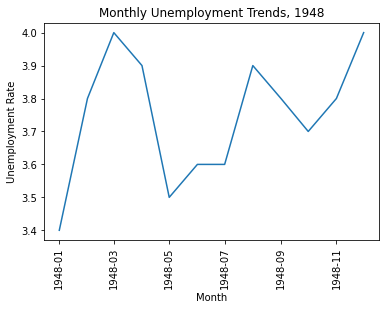

In [11]:
# Assign the first 12 rows to a variable 
first_twelve = unrate[:12]

# Generate a line chart that visualizes the unemployment rates from 1948
plt.plot(first_twelve['DATE'], first_twelve['VALUE'])

# Rotate the x-axis tick labels by 90 degrees
plt.xticks(rotation = 90)

# Set the x-axis label to "Month"
plt.xlabel('Month')

# Set the y-axis label to "Unemployment Rate"
plt.ylabel('Unemployment Rate')

# Set the plot title to "Monthly Unemployment Trends, 1948"
plt.title('Monthly Unemployment Trends, 1948')

# Display the plot
plt.show()

## 2. Matplotlib Classes

When we were working with a single plot, pyplot was storing and updating the state of that single plot. We could tweak the plot just using the functions in the pyplot module. 

When we want to work with multiple plots, however, we need to be more explicit about which plot we're making changes to. This means we need to understand the matplotlib classes that pyplot uses internally to maintain state so we can interact with them directly. 

Let's first start by understanding what pyplot was automatically storing under the hood when we create a single plot:

1. a container for all plots was created (returned as a [Figure object](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure))
2. a container for the plot was positioned on a grid (the plot returned as an [Axes object](http://matplotlib.org/api/axes_api.html#matplotlib-axes))
3. visual symbols were added to the plot (using the Axes methods)

A **figure** acts as a container for all of our plots and has methods for customizing the appearance and behavior for the plots within that container. Some examples include changing the overall width and height of the plotting area and the spacing between plots.

We can manually create a figure by calling [pyplot.figure()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.figure):


```
fig = plt.figure()
```




Instead of only calling the pyplot function, we assigned its return value to a variable (`fig`). After a figure is created, an axes for a single plot containing no data is created within the context of the figure. When rendered without data, the plot will resemble the empty plot from the previous mission. The **Axes object acts as its own container for the various components of the plot**, such as:

- **values** on the x-axis and y-axis
- **ticks** on the x-axis and y-axis
- all visual symbols, such as:
  - **markers**
  - **lines**
  - **gridlines**

While plots are represented using instances of the Axes class, they're also often referred to as subplots in matplotlib. To add a new subplot to an existing figure, use [Figure.add_subplot](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_subplot). This will return a new Axes object, which needs to be assigned to a variable:
```
axes_obj = fig.add_subplot(nrows, ncols, plot_number)
```
If we want the figure to contain 2 plots, one above the other, we need to write:
```
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
```
This will create a grid, 2 rows by 1 column, of plots.

## 3. Matplotlib Classes

Let's create a figure, add subplots to it, and display it.

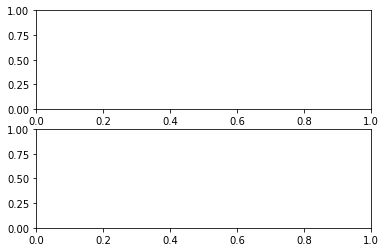

In [12]:
# Create a figure and assign to fig
fig = plt.figure()

# Create two subplots above and below each other
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

# Display the resulting plot 
plt.show()

## 4. Grid Positioning

For each subplot, matplotlib generated a coordinate grid that was similar to the one we generated in the last mission using the `plot()` function:

- the x-axis and y-axis values ranging from 0.0 to 1.0
- no gridlines
- no data

The main difference is that this plot ranged from `0.0` to `1.0` instead of from `-0.06` to `0.06`, which is a quirk suggested by a difference in default properties.

Now that we have a basic understanding of the important matplotlib classes, we can create multiple plots to compare monthly unemployment trends. If you recall, we need to specify the position of each subplot on a grid. Here's a diagram that demonstrates how a 2 by 2 subplot layout would look like:

![alt text](https://s3.amazonaws.com/dq-content/multiple_subplots.png)

When the first subplot is created, matplotlib knows to create a grid with 2 rows and 2 columns. As we add each subplot, we specify the plot number we want returned and the corresponding Axes object is created and returned. In matplotlib, the plot number starts at the top left position in the grid (left-most plot on the top row), moves through the remaining positions in that row, then jumps to the left-most plot in the second row, and so forth.
![alt text](https://s3.amazonaws.com/dq-content/subplot_grid.png)

If we created a grid of 4 subplots but don't create a subplot for each position in the grid, areas without axes are left blank:
![alt text](https://s3.amazonaws.com/dq-content/multiple_subplots_missing_one_plot.png)

## 5. Adding Data

To generate a line chart within an Axes object, we need to call `Axes.plot()` and pass in the data you want plotted:
```
x_values = [0.0, 0.5, 1.0]
y_values = [10, 20, 40]
ax1.plot(x_values, y_values)
```
Like `pyplot.plot()`, the `Axes.plot()` will accept any iterable object for these parameters, including NumPy arrays and pandas Series objects. It will also generate a line chart by default from the values passed in. Each time we want to generate a line chart, we need to call `Axes.plot()` and pass in the data we want to use in that plot.

Instructions:

Create 2 line subplots in a 2 row by 1 column layout:

- In the top subplot, plot the data from 1948.
  - For the x-axis, use the first 12 values in the `DATE` column.
  - For the y-axis, use the first 12 values in the `VALUE` column.
- In the bottom subplot, plot the data from 1949.
  - For the x-axis, use the values from index 12 to 23 in the `DATE` column.
  - For the y-axis, use the values from index 12 to 23 in the `VALUE` column.
Use `plt.show()` to display all the plots.

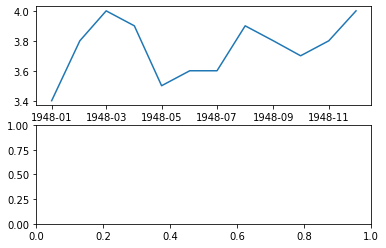

In [13]:
# Create a figure and assign to fig
fig = plt.figure()

# In the top subplot plot the data from 1948
ax1 = fig.add_subplot(2,1,1)
ax1.plot(unrate[0:12]['DATE'], unrate[0:12]['VALUE'])

# In the bottom subplot, plot the data from 1949
ax2.plot(unrate[12:24]['DATE'], unrate[12:24]['VALUE'])
ax2 = fig.add_subplot(2,1,2)

# Display the resulting plots
plt.show()

## 6. Formatting And Spacing

One issue with the 2 plots is that the x-axis ticks labels are unreadable. The other issue is that the plots are squeezed together vertically and hard to interpret. Even though now we generated 2 line charts, the total plotting area for the figure remained the same:
![alt text](https://s3.amazonaws.com/dq-content/plotting_area_stays_same.png)

This is because matplotlib used the default dimensions for the total plotting area instead of resizing it to accommodate the plots. If we want to expand the plotting area, we have to specify this ourselves when we create the figure. To tweak the dimensions of the plotting area, we need to use the `figsize` parameter when we call `plt.figure()`:

This parameter takes in a tuple of floats:

```
fig = plt.figure(figsize=(width, height))
```

The unit for both width and height values is inches. The `dpi` parameter, or dots per inch, and the `figsize` parameter determine how much space on your display a plot takes up. By increasing the width and the height of the plotting area, we can address both issues.

Instructions:

For the plot we generated on the last screen, set the width of the plotting area to `12` inches and the height to `8` inches.

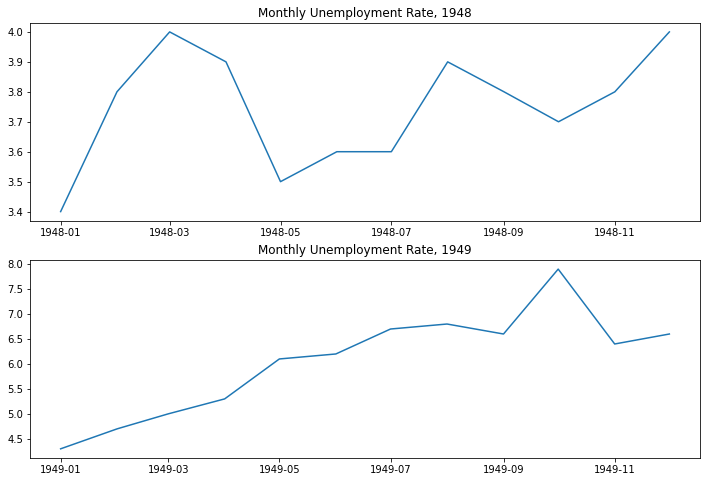

In [16]:
# Set the width of the plotting area to 12 inches and the height to 8 inches
fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(unrate[0:12]['DATE'], unrate[0:12]['VALUE'])
ax1.set_title('Monthly Unemployment Rate, 1948')
ax2.plot(unrate[12:24]['DATE'], unrate[12:24]['VALUE'])
ax2.set_title('Monthly Unemployment Rate, 1949')
plt.show()

## 7. Comparing Across More Years

Instead of having to rotate the x-axis tick labels, we were able to horizontally extend the entire plotting area to make the labels more readable. Because the goal is to be able to look for any visual similarities between the lines in the plots, we want the space between the 2 plots to be as small as possible. If we had rotated the labels by 90 degrees instead, like we did in the last mission, we'd need to increase the spacing between the plots to keep them from overlapping. Expanding the plotting area horizontally improved the readability of the x-axis tick labels and minimized the amount of space between the 2 line charts.

If you recall, we generated these 2 line charts because we were interested in looking for any seasonality in the monthly unemployment trends. If you spend some time visually analyzing both line charts, you'll discover that there's no changes in unemployment trends that are occurring in the same month in both years.

On this screen, we're going to visualize data from a few more years to see if we find any evidence for seasonality between those years. Because we're going to need to plot multiple years, we can use a loop so that we're not repeating unnecessary code. In order to generate values for the loop, we'll use Python's range() function, which produces a list of numbers. Let's start by seeing how the function works:


```
for i in range(5):
    print(i)
```


```
0
1
2
3
4
```




We provide an integer argument to `range()`, and it produces a sequence of integers starting at zero, and going up to (but not including) the argument's value. Let's use this technique to plot five years of data.



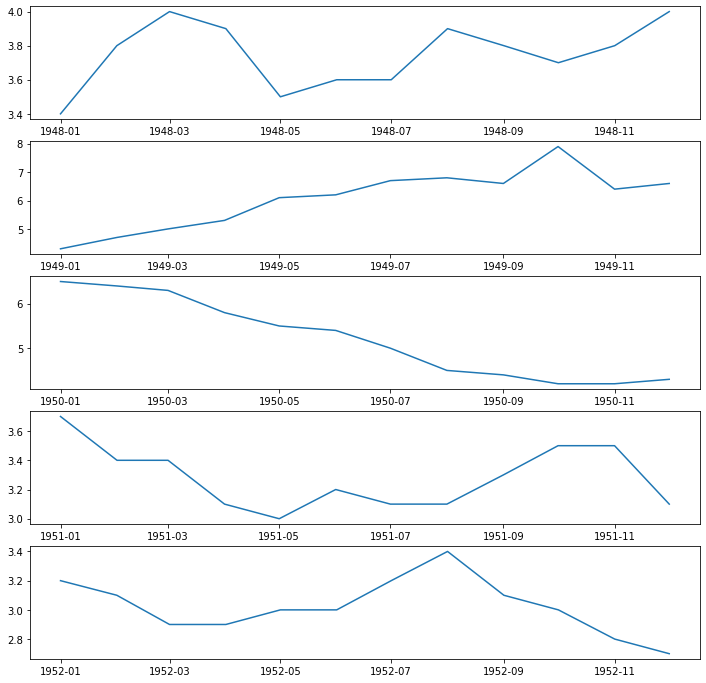

In [17]:
fig = plt.figure(figsize=(12,12))

for i in range(5):
    ax = fig.add_subplot(5,1,i+1)
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    ax.plot(subset['DATE'], subset['VALUE'])
                                   
plt.show()

## 8. Overlaying Line Charts

By adding more line charts, we can look across more years for seasonal trends. This comes at a cost, unfortunately. We now have to visually scan over more space, which is a limitation that we experienced when scanning the table representation of the same data. If you recall, one of the limitations of the table representation we discussed in the previous mission was the amount of time we'd have to spend scanning the table as the number of rows increased significantly.

We can handle the visual overhead each additional plot adds by overlaying the line charts in a single subplot. If we remove the year from the x-axis and just keep the month values, we can use the same x-axis values to plot all of the lines. First, we'll explore how to extract just the month values from the `DATE` column, then we'll dive into generating multiple plots on the same coordinate grid.

To extract the month values from the `DATE` column and assign them to a new column, we can use the `pandas.Series.dt` accessor:

```
unrate['MONTH'] = unrate['DATE'].dt.month
```



Calling `pandas.Series.dt.month` returns a Series containing the integer values for each month (e.g. `1` for January, `2` for February, etc.). Under the hood, pandas applies the [datetime.date.month](https://docs.python.org/3/library/datetime.html#datetime.date.month) attribute from the [datetime.date class](https://docs.python.org/3/library/datetime.html#datetime.date) over each datetime value in the `DATE` column, which returns the integer month value. Let's now move onto generating multiple line charts in the same subplot.

In the last mission, we called `pyplot.plot()` to generate a single line chart. Under the hood, matplotlib created a figure and a single subplot for this line chart. If we call `pyplot.plot()` multiple times, matplotlib will generate the line charts on the single subplot.
```
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'])
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'])
```




If we want to set the dimensions for the plotting area, we can create the figure ourselves first then plot the data. This is because matplotlib first checks if a figure already exists before plotting data. It will only create one if we didn't create a figure.


```
fig = plt.figure(figsize=(6,6))
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'])
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'])
```

By default, matplotlib will select a different color for each line. To specify the color ourselves, use the `c` parameter when calling `plot()`:


```
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c='red')
```
You can read about the different ways we can specify colors in matplotlib [here](http://matplotlib.org/api/colors_api.html).


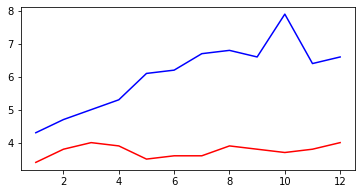

In [18]:
unrate['MONTH'] = unrate['DATE'].dt.month

fig = plt.figure(figsize=(6,3))
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c='red')
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'], c='blue')

plt.show()

## 9. Adding More Lines

Let's visualize 5 years worth of unemployment rates on the same subplot.

Instructions:
Generate the following plots in the base subplot:

- 1948: set the line color to "red"
- 1949: set the line color to "blue"
- 1950: set the line color to "green"
- 1951: set the line color to "orange"
- 1952: set the line color to "black"

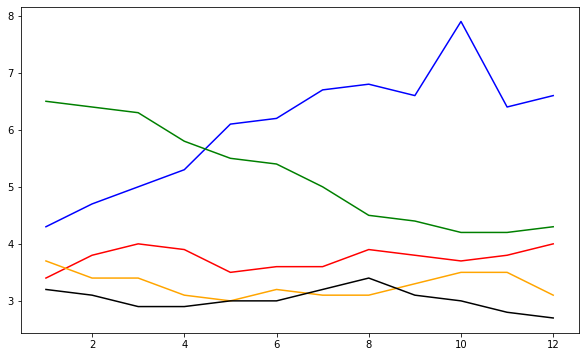

In [19]:
fig = plt.figure(figsize=(10,6))
colours = ['red', 'blue', 'green', 'orange', 'black']

for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    plt.plot(subset['MONTH'], subset['VALUE'], c=colours[i])
                                   
plt.show()

## 10. Adding A Legend

How colorful! By plotting all of the lines in one coordinate grid, we got a different perspective on the data. The main thing that sticks out is how the blue and green lines span a larger range of y values (4% to 8% for blue and 4% to 7% for green) while the 3 plots below them mostly range only between 3% and 4%. You can tell from the last sentence that we don't know which line corresponds to which year, because the x-axis now only reflects the month values.

To help remind us which year each line corresponds to, we can add a legend that links each color to the year the line is representing. Here's what a legend for the lines in the last screen could look like:

![alt text](https://s3.amazonaws.com/dq-content/legend.png)

When we generate each line chart, we need to specify the text label we want each color linked to. The `pyplot.plot()` function contains a `label` parameter, which we use to set the year value:

```
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c='red', label='1948')
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'], c='blue', label='1949')
```

We can create the legend using [pyplot.legend](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend) and specify its location using the `loc` parameter:

```
plt.legend(loc='upper left')
```
If we're instead working with multiple subplots, we can create a legend for each subplot by mirroring the steps for each subplot. When we use `plt.plot()` and `plt.legend()`, the `Axes.plot()` and [Axes.legend()](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.legend) methods are called under the hood and parameters passed to the calls. When we need to create a legend for each subplot, we can use `Axes.legend()` instead.

Let's now add a legend for the plot we generated in the last screen.

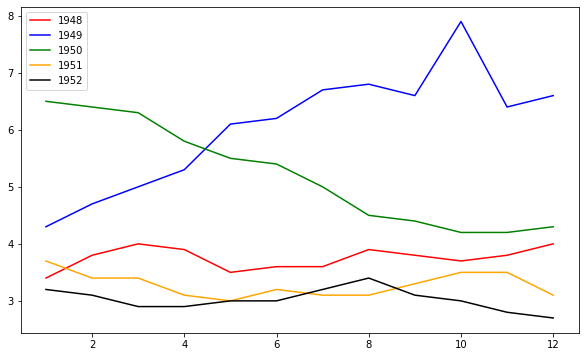

In [20]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=str(1948+i))
plt.legend(loc='upper left')
plt.show()

## 11. Final Tweaks

Instead of referring back to the code each time we want to confirm what subset each line corresponds to, we can focus our gaze on the plotting area and use the legend. At the moment, the legend unfortunately covers part of the green line (which represents data from 1950). Since the legend isn't critical to the plot, we should move this outside of the coordinate grid. We'll explore how to do so in a later course because it requires a better understanding of some design principles as well as matplotlib.

Before we wrap up this mission, let's enhance the visualization by adding a title and labels for both axes. To set the title, we use [pyplot.title()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.title) and pass in a string value:

```
plt.title("Monthly Unemployment Trends, 1948-1952")
```
To set the x-axis and y-axis labels, we use [pyplot.xlabel()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.xlabel) and [pyplot.ylabel()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.ylabel). Both of these functions accept string values.


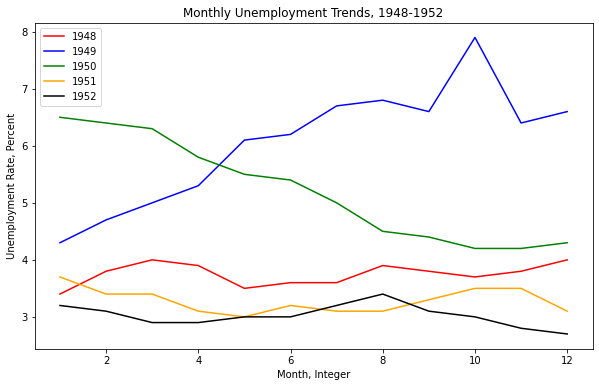

In [21]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    label = str(1948 + i)
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=label)
plt.legend(loc='upper left')
plt.xlabel('Month, Integer')
plt.ylabel('Unemployment Rate, Percent')
plt.title('Monthly Unemployment Trends, 1948-1952')

plt.show()



---



In the next mission, we'll explore plots that allow us to visualize discrete data.

